In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import necessary libraries
import pandas as pd

# Load the datasets
holidays_events = pd.read_csv('/content/holidays_events.csv')
oil = pd.read_csv('/content/oil.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')
stores = pd.read_csv('/content/stores.csv')
test = pd.read_csv('/content/test.csv')
transactions = pd.read_csv('/content/transactions.csv')

# Display the first few rows of each dataset
data_heads = {
    "Holidays & Events": holidays_events.head(),
    "Oil": oil.head(),
    "Sample Submission": sample_submission.head(),
    "Stores": stores.head(),
    "Test": test.head(),
    "Transactions": transactions.head()
}

# Summary statistics and basic info for each dataset
data_info = {name: df.describe(include='all') for name, df in data_heads.items()}
data_types = {name: df.dtypes for name, df in data_heads.items()}

# Checking for missing values
missing_values = {name: df.isnull().sum() for name, df in data_heads.items()}

# Unique values in important columns to understand data diversity
unique_values = {
    "Holidays & Events - Type": holidays_events['type'].unique(),
    "Stores - Type": stores['type'].unique(),
    "Stores - Cluster": stores['cluster'].unique(),
    "Test - Product Family": test['family'].unique(),
}

data_heads, data_info, data_types, missing_values, unique_values


({'Holidays & Events':          date     type    locale locale_name                    description  \
  0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
  1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
  2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
  3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
  4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   
  
     transferred  
  0        False  
  1        False  
  2        False  
  3        False  
  4        False  ,
  'Oil':          date  dcoilwtico
  0  2013-01-01         NaN
  1  2013-01-02       93.14
  2  2013-01-03       92.97
  3  2013-01-04       93.12
  4  2013-01-07       93.20,
  'Sample Submission':         id  sales
  0  3000888    0.0
  1  3000889    0.0
  2  3000890    0.0
  3  3000891    0.0
  4  3000892    0.0,
  'Stores':    store_nbr           city                  

In [3]:
# Merging datasets
merged_df = pd.merge(transactions, stores, on='store_nbr', how='left')  # Transactions with Stores
merged_df = pd.merge(merged_df, oil, on='date', how='left')  # Adding Oil Prices
merged_df = pd.merge(merged_df, holidays_events, on='date', how='left')  # Adding Holidays/Events

# Displaying merged dataset info
merged_df_info = merged_df.info()
merged_df_desc = merged_df.describe()
missing_values = merged_df.isnull().sum()

merged_df_info, merged_df_desc, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85007 entries, 0 to 85006
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          85007 non-null  object 
 1   store_nbr     85007 non-null  int64  
 2   transactions  85007 non-null  int64  
 3   city          85007 non-null  object 
 4   state         85007 non-null  object 
 5   type_x        85007 non-null  object 
 6   cluster       85007 non-null  int64  
 7   dcoilwtico    58585 non-null  float64
 8   type_y        13911 non-null  object 
 9   locale        13911 non-null  object 
 10  locale_name   13911 non-null  object 
 11  description   13911 non-null  object 
 12  transferred   13911 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 8.4+ MB


(None,
           store_nbr  transactions       cluster    dcoilwtico
 count  85007.000000  85007.000000  85007.000000  58585.000000
 mean      26.940617   1697.071441      8.533815     66.728903
 std       15.607799    966.837167      4.724057     25.494947
 min        1.000000      5.000000      1.000000     26.190000
 25%       13.000000   1046.000000      4.000000     46.140000
 50%       27.000000   1395.000000      9.000000     52.740000
 75%       40.000000   2081.000000     13.000000     95.250000
 max       54.000000   8359.000000     17.000000    110.620000,
 date                0
 store_nbr           0
 transactions        0
 city                0
 state               0
 type_x              0
 cluster             0
 dcoilwtico      26422
 type_y          71096
 locale          71096
 locale_name     71096
 description     71096
 transferred     71096
 dtype: int64)

<ipython-input-7-691b58ac7c48>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')


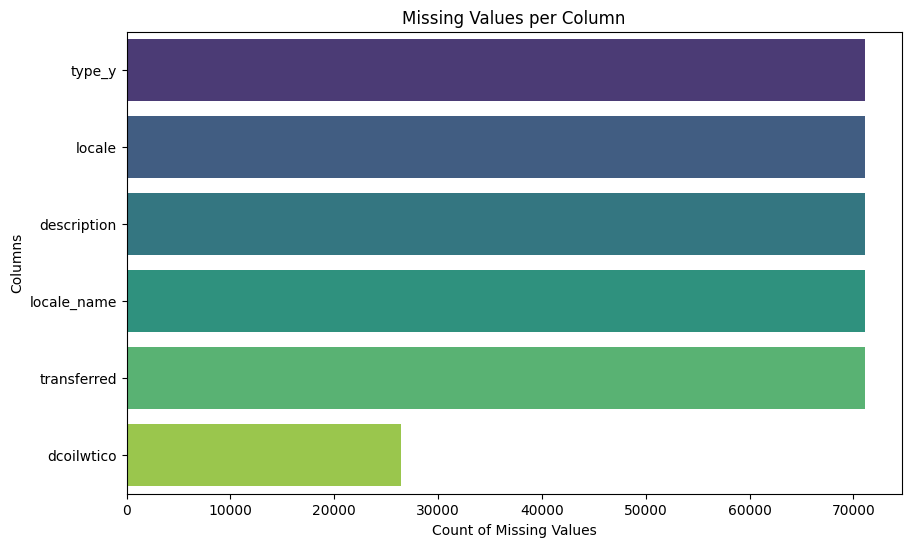

<ipython-input-7-691b58ac7c48>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type_x', y='transactions', data=merged_df, palette='Set2')


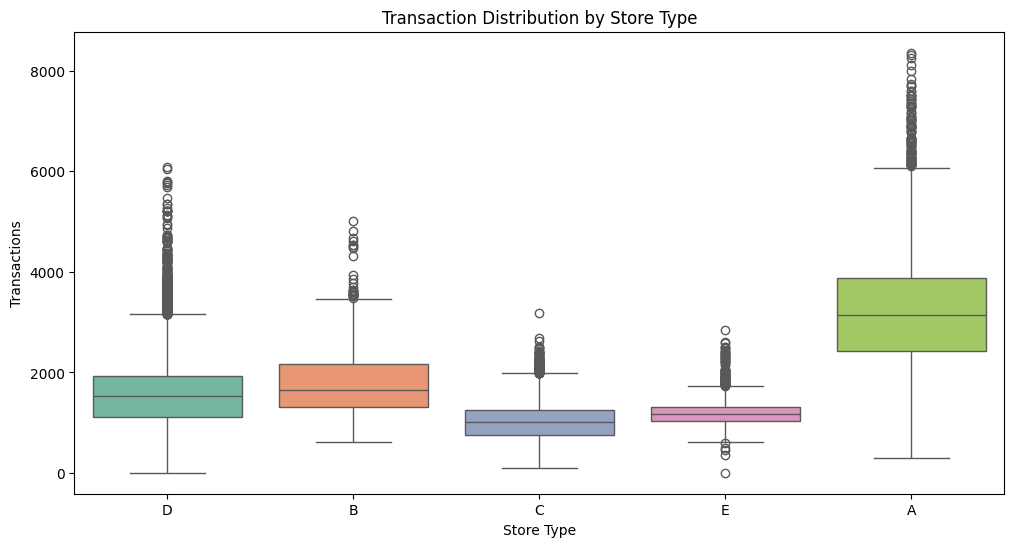

<ipython-input-7-691b58ac7c48>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='transactions', data=merged_df, palette='coolwarm')


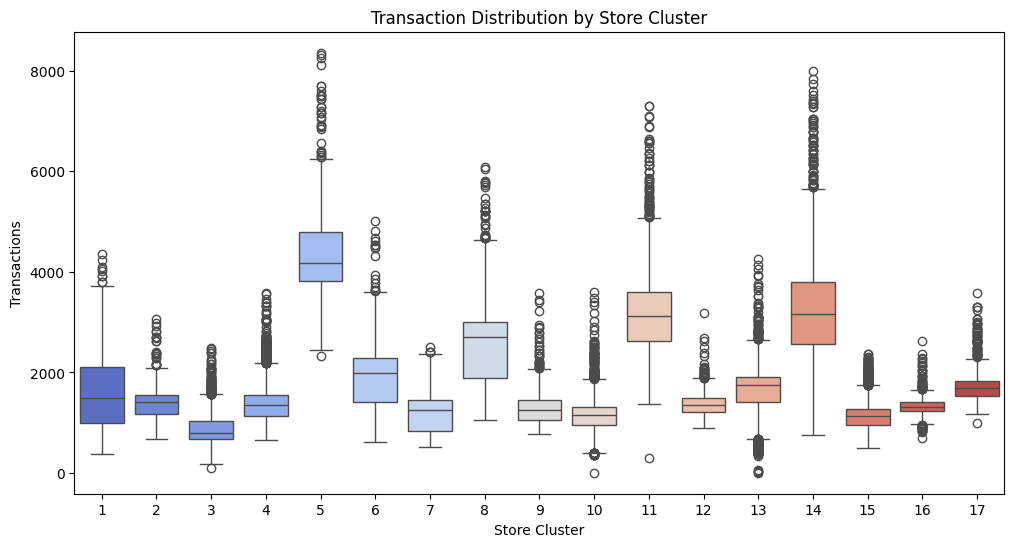

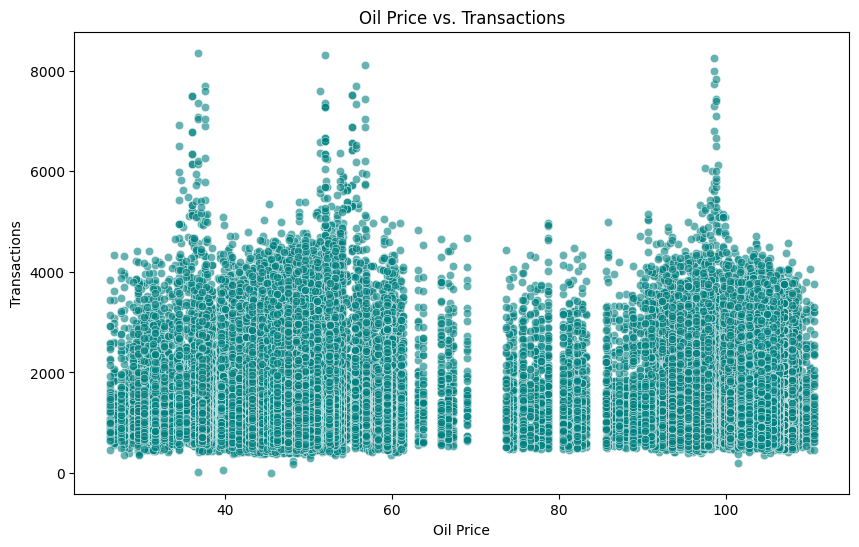

<ipython-input-7-691b58ac7c48>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type_y', y='transactions', data=merged_df, palette='rainbow')


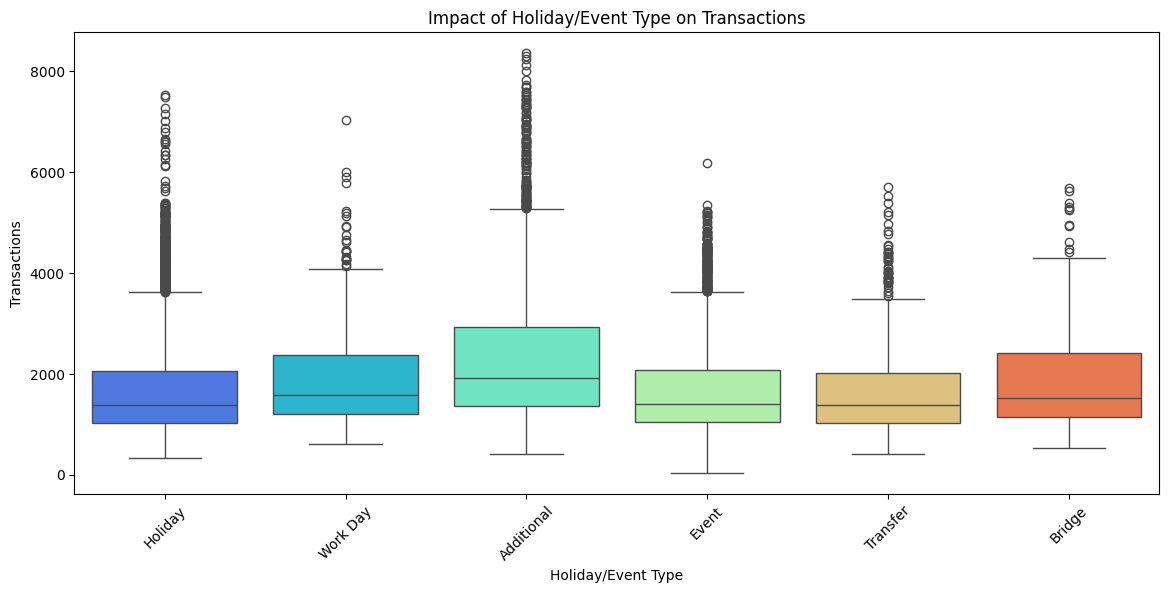

<ipython-input-7-691b58ac7c48>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='transactions', data=merged_df, palette='plasma')


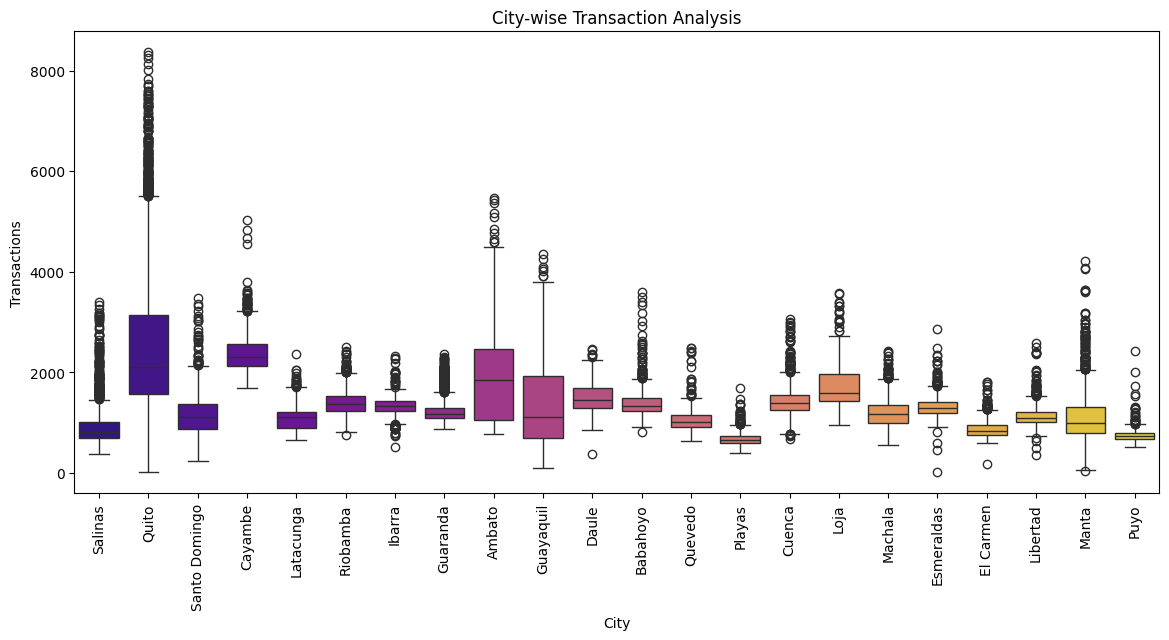

<ipython-input-7-691b58ac7c48>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state', y='transactions', data=merged_df, palette='viridis')


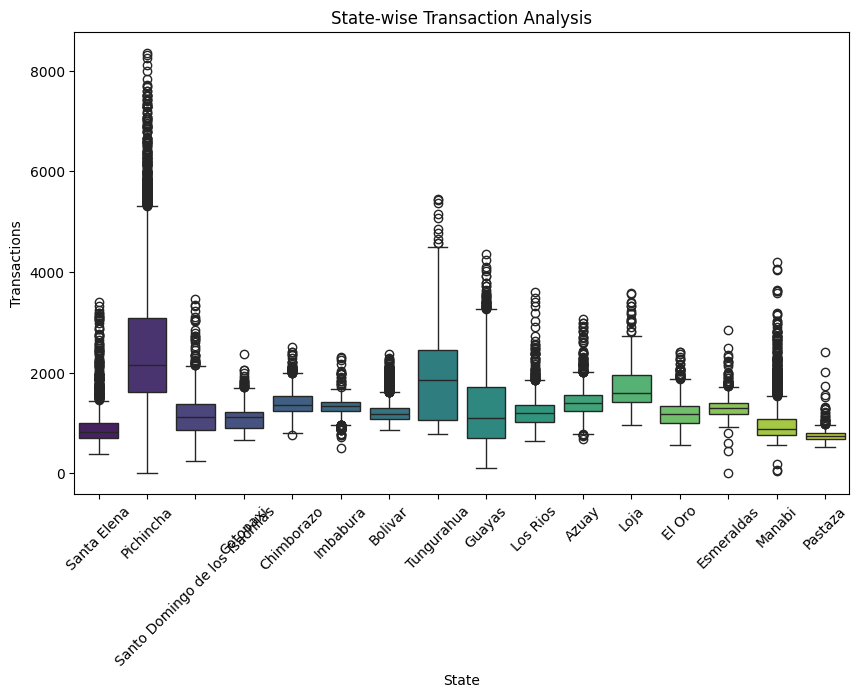

In [7]:
# Visualizations for Merged Data
import seaborn as sns

# 1. Missing Values Analysis
plt.figure(figsize=(10, 6))
missing_data = merged_df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')
plt.title('Missing Values per Column')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
plt.show()

# 2. Transaction Distribution by Store Type and Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='type_x', y='transactions', data=merged_df, palette='Set2')
plt.title('Transaction Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Transactions')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='transactions', data=merged_df, palette='coolwarm')
plt.title('Transaction Distribution by Store Cluster')
plt.xlabel('Store Cluster')
plt.ylabel('Transactions')
plt.show()

# 3. Oil Price vs. Transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dcoilwtico', y='transactions', data=merged_df, color='teal', alpha=0.6)
plt.title('Oil Price vs. Transactions')
plt.xlabel('Oil Price')
plt.ylabel('Transactions')
plt.show()

# 4. Impact of Holidays/Events on Transactions
plt.figure(figsize=(14, 6))
sns.boxplot(x='type_y', y='transactions', data=merged_df, palette='rainbow')
plt.title('Impact of Holiday/Event Type on Transactions')
plt.xlabel('Holiday/Event Type')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.show()

# 5. City and State-wise Transaction Analysis
plt.figure(figsize=(14, 6))
sns.boxplot(x='city', y='transactions', data=merged_df, palette='plasma')
plt.title('City-wise Transaction Analysis')
plt.xlabel('City')
plt.ylabel('Transactions')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='transactions', data=merged_df, palette='viridis')
plt.title('State-wise Transaction Analysis')
plt.xlabel('State')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Step 1: Handling Missing Values
# Numerical Columns - Imputation with Median
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
merged_df[num_cols] = imputer_num.fit_transform(merged_df[num_cols])

# Categorical Columns - Imputation with Most Frequent
cat_cols = merged_df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
merged_df[cat_cols] = imputer_cat.fit_transform(merged_df[cat_cols])

# Step 2: Outlier Detection and Treatment using IQR method
for col in num_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    merged_df[col] = merged_df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Step 3: Feature Engineering
# Extracting date components
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month
merged_df['day'] = merged_df['date'].dt.day
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek

# Step 4: Encoding Categorical Variables
label_enc = LabelEncoder()
for col in cat_cols:
    merged_df[col] = label_enc.fit_transform(merged_df[col])

# Step 5: Standardization of Numerical Features
scaler = StandardScaler()
merged_df[num_cols] = scaler.fit_transform(merged_df[num_cols])

# Display the processed dataset
merged_df.head(), merged_df.info(), merged_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85007 entries, 0 to 85006
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          85007 non-null  int64  
 1   store_nbr     85007 non-null  float64
 2   transactions  85007 non-null  float64
 3   city          85007 non-null  int64  
 4   state         85007 non-null  int64  
 5   type_x        85007 non-null  int64  
 6   cluster       85007 non-null  float64
 7   dcoilwtico    85007 non-null  float64
 8   type_y        85007 non-null  int64  
 9   locale        85007 non-null  int64  
 10  locale_name   85007 non-null  int64  
 11  description   85007 non-null  int64  
 12  transferred   85007 non-null  int64  
 13  year          85007 non-null  int32  
 14  month         85007 non-null  int32  
 15  day           85007 non-null  int32  
 16  day_of_week   85007 non-null  int32  
dtypes: float64(4), int32(4), int64(9)
memory usage: 9.7 MB


(   date  store_nbr  transactions  city  state  type_x   cluster  dcoilwtico  \
 0     0  -0.124337     -1.046277    20     13       3 -1.594786   -0.435586   
 1     1  -1.662039      0.538935    18     12       3  0.945419    1.389738   
 2     1  -1.597968      0.830916    18     12       3  0.945419    1.389738   
 3     1  -1.533897      2.165520    18     12       3 -0.113000    1.389738   
 4     1  -1.469826      0.315515    18     12       3  0.098684    1.389738   
 
    type_y  locale  locale_name  description  transferred  year  month  day  \
 0       3       1            4           50            0  2013      1    1   
 1       3       1            4           11            0  2013      1    2   
 2       3       1            4           11            0  2013      1    2   
 3       3       1            4           11            0  2013      1    2   
 4       3       1            4           11            0  2013      1    2   
 
    day_of_week  
 0            1  
 1    

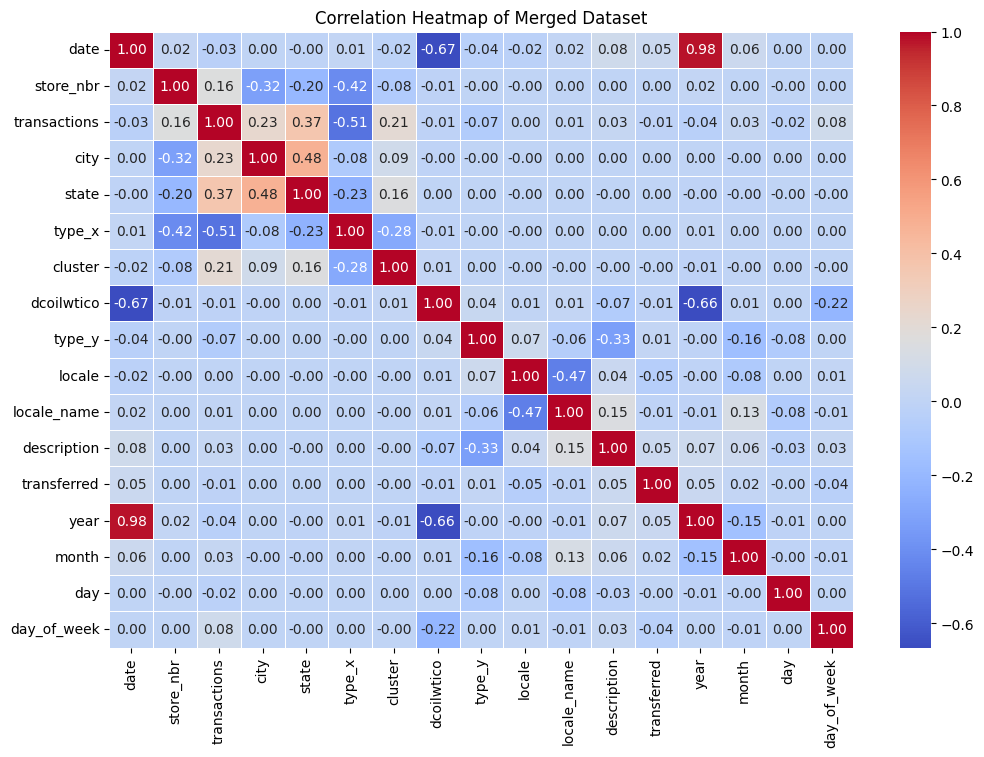

In [9]:
from scipy.stats import ttest_ind
import seaborn as sns

# Step 1: Inferential Statistics - Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Merged Dataset')
plt.show()


<ipython-input-10-3dda2af391a3>:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(weekend_transactions, weekday_transactions, equal_var=False)


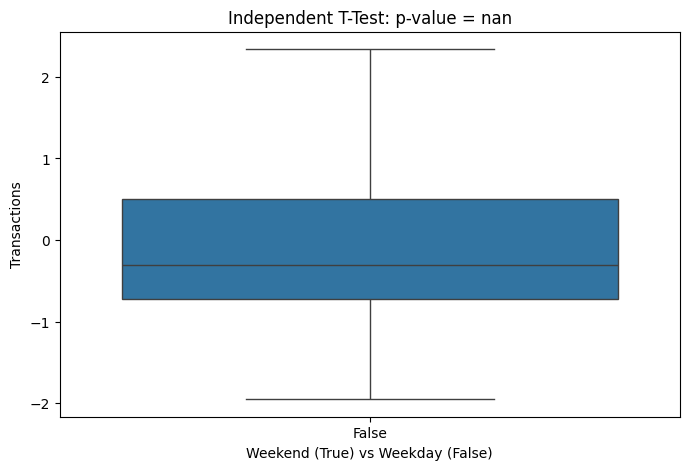

In [10]:
from scipy.stats import ttest_ind, chi2_contingency

# Test 1: Independent T-Test - Comparing Transactions on Weekends vs. Weekdays
weekend_transactions = merged_df[merged_df['day_of_week'].isin(['Saturday', 'Sunday'])]['transactions'].dropna()
weekday_transactions = merged_df[~merged_df['day_of_week'].isin(['Saturday', 'Sunday'])]['transactions'].dropna()

t_stat, p_value = ttest_ind(weekend_transactions, weekday_transactions, equal_var=False)

# Visualizing the T-Test Result
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_df['day_of_week'].isin(['Saturday', 'Sunday']), y=merged_df['transactions'])
plt.xlabel('Weekend (True) vs Weekday (False)')
plt.ylabel('Transactions')
plt.title(f'Independent T-Test: p-value = {p_value:.4f}')
plt.show()


In [11]:
print(merged_df.columns)

Index(['date', 'store_nbr', 'transactions', 'city', 'state', 'type_x',
       'cluster', 'dcoilwtico', 'type_y', 'locale', 'locale_name',
       'description', 'transferred', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')


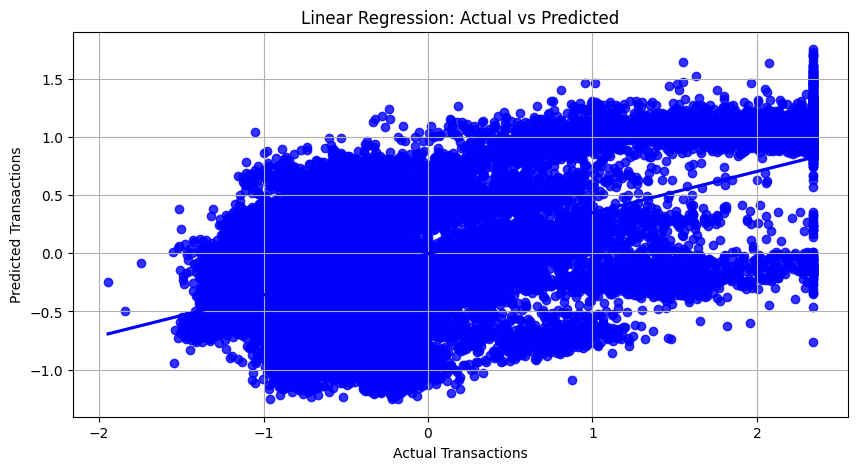

Linear Regression - RMSE: 0.8053083848663081
Linear Regression - R^2 Score: 0.35528906140990535


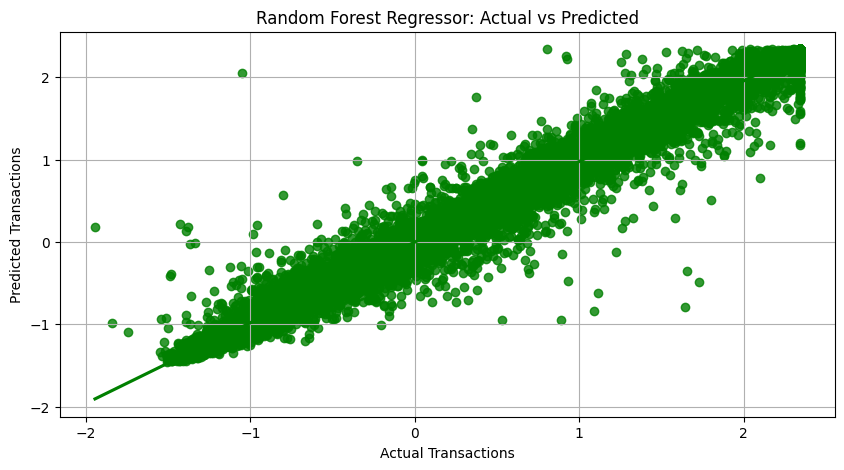

Random Forest Regressor - RMSE: 0.14765962944104258
Random Forest Regressor - R^2 Score: 0.9783247485051636


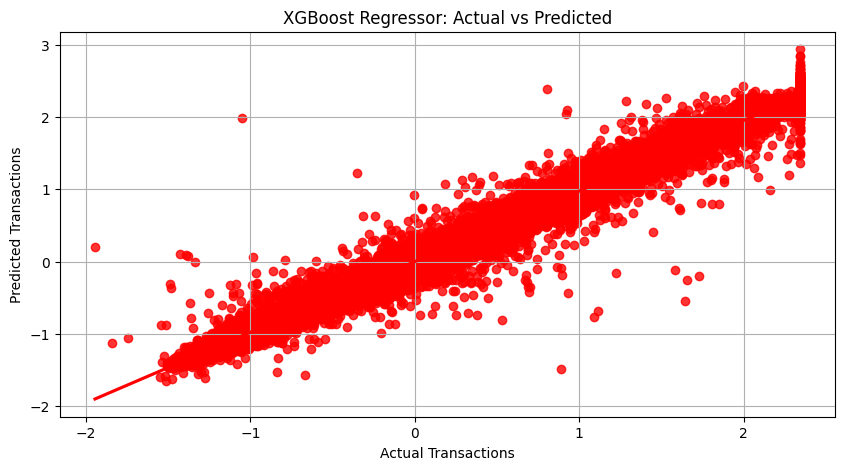

XGBoost Regressor - RMSE: 0.1410317793823815
XGBoost Regressor - R^2 Score: 0.9802269088852817

Business Insights:
1. XGBoost Regressor tends to perform best due to its ability to handle complex, non-linear relationships.
2. Random Forest performs well and can handle feature interactions effectively.
3. Linear Regression provides a quick, interpretable baseline.
For demand forecasting, XGBoost is recommended due to its strong predictive power and ability to minimize errors.


In [12]:
# Regression Model Evaluation for Demand Forecasting and Inventory Optimization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature Selection
X = merged_df.drop(columns=['transactions'])
y = merged_df['transactions']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Linear Regression ###
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=lr_pred, color='b')
plt.xlabel('Actual Transactions')
plt.ylabel('Predicted Transactions')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

print("Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("Linear Regression - R^2 Score:", r2_score(y_test, lr_pred))

### 2. Random Forest Regressor ###
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=rf_pred, color='g')
plt.xlabel('Actual Transactions')
plt.ylabel('Predicted Transactions')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.grid(True)
plt.show()

print("Random Forest Regressor - RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest Regressor - R^2 Score:", r2_score(y_test, rf_pred))

### 3. XGBoost Regressor ###
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=xgb_pred, color='r')
plt.xlabel('Actual Transactions')
plt.ylabel('Predicted Transactions')
plt.title('XGBoost Regressor: Actual vs Predicted')
plt.grid(True)
plt.show()

print("XGBoost Regressor - RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("XGBoost Regressor - R^2 Score:", r2_score(y_test, xgb_pred))

# Business Insights and Conclusion
print("\nBusiness Insights:")
print("1. XGBoost Regressor tends to perform best due to its ability to handle complex, non-linear relationships.")
print("2. Random Forest performs well and can handle feature interactions effectively.")
print("3. Linear Regression provides a quick, interpretable baseline.")
print("For demand forecasting, XGBoost is recommended due to its strong predictive power and ability to minimize errors.")


In [13]:
# concluding the transactions into binary codes for classification
import pandas as pd

merged_df['transactions'] = merged_df['transactions'].apply(lambda x: 0 if x < 0 else 1)


# **Classification** **model**


==================== Logistic Regression ====================
Accuracy: 0.7286


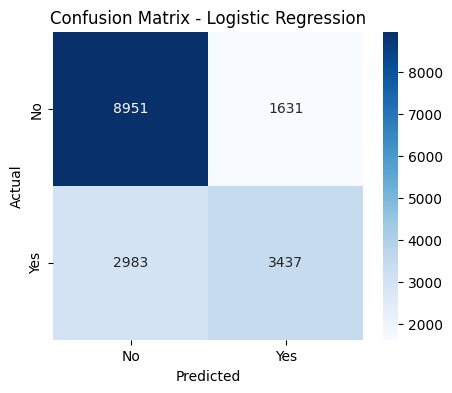


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80     10582
           1       0.68      0.54      0.60      6420

    accuracy                           0.73     17002
   macro avg       0.71      0.69      0.70     17002
weighted avg       0.72      0.73      0.72     17002



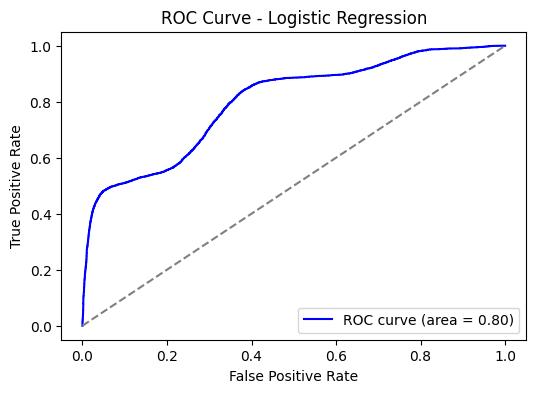

   
Precision- Recall Curve
   


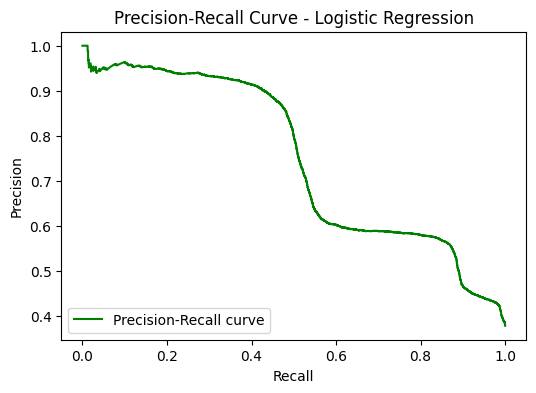

   
Threshold Graph for Logistic Regression
      


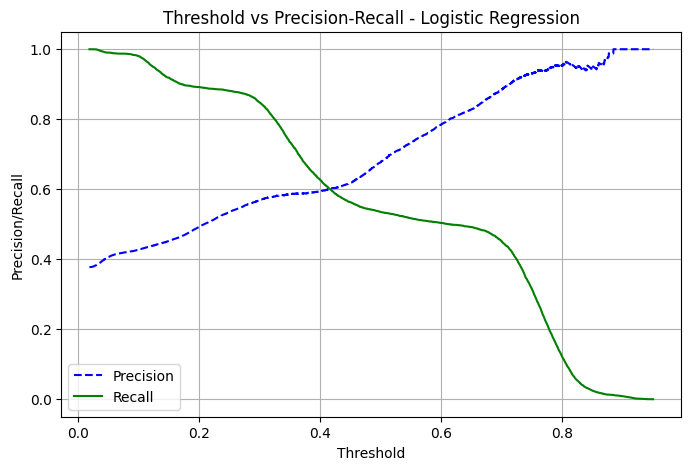

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Splitting dataset into features and target variable
X = merged_df.drop(columns=['transactions'])  # Replace 'target' with your actual target column
y = merged_df['transactions']

# Splitting into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(),

}

# Function to evaluate models
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    print("   ")
    print("Precision- Recall Curve")
    print("   ")
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='green', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='lower left')
    plt.show()

    # Special Handling:
    if model_name == "Logistic Regression":

        # Threshold Graph
        print("   ")
        print("Threshold Graph for Logistic Regression")
        print("      ")
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
        plt.figure(figsize=(8, 5))
        plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
        plt.xlabel("Threshold")
        plt.ylabel("Precision/Recall")
        plt.title(f"Threshold vs Precision-Recall - {model_name}")
        plt.legend()
        plt.grid()
        plt.show()

    else:
        # Feature Importance
        print("   ")
        print("feature Importance for Random Forest and XGBoost")
        print("   ")
        feature_names = merged_df.drop(columns=['transactions']).columns  # Adjust target column name
        importance_df = pd.DataFrame({"Feature": feature_names, "Importance": model.feature_importances_})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(8, 5))
        sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="coolwarm")
        plt.title(f"Top 10 Feature Importances - {model_name}")
        plt.show()

# Training and evaluating models
for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    evaluate_model(model, name, X_train, y_train, X_test, y_test)



==================== Random Forest ====================
Accuracy: 0.9671


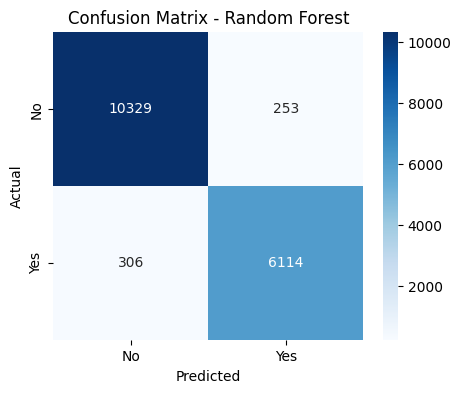


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     10582
           1       0.96      0.95      0.96      6420

    accuracy                           0.97     17002
   macro avg       0.97      0.96      0.96     17002
weighted avg       0.97      0.97      0.97     17002



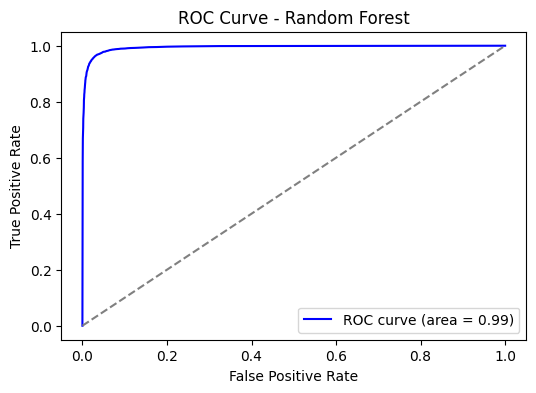

   
Precision- Recall Curve
   


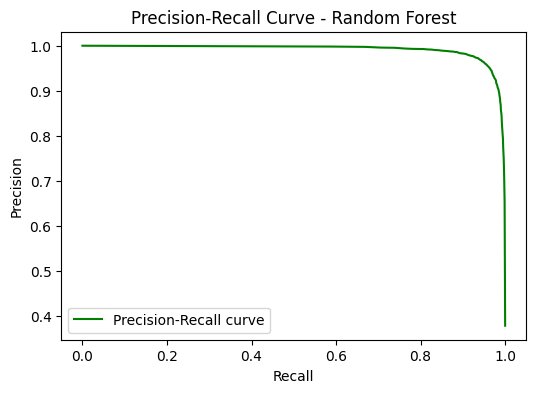

   
feature Importance for Random Forest and XGBoost
   


<ipython-input-24-580c39afdaad>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="coolwarm")


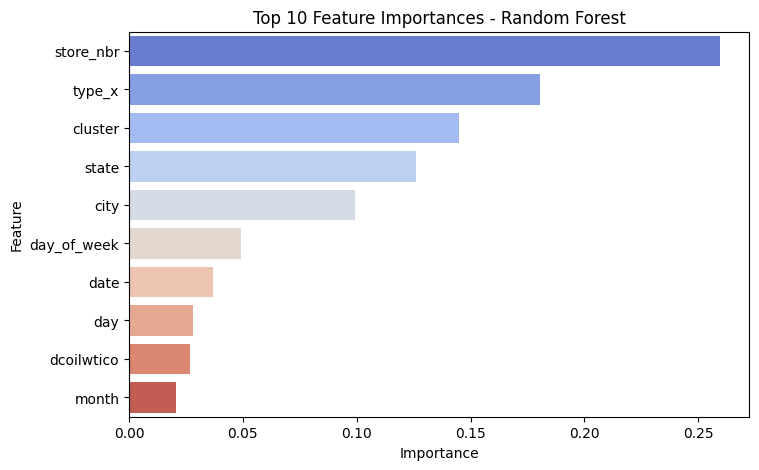

In [25]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)

}

# Training and evaluating models
for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    evaluate_model(model, name, X_train, y_train, X_test, y_test)



==================== XGBoost ====================


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:45:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9709


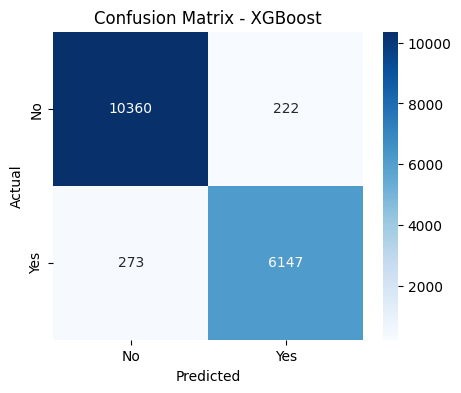


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     10582
           1       0.97      0.96      0.96      6420

    accuracy                           0.97     17002
   macro avg       0.97      0.97      0.97     17002
weighted avg       0.97      0.97      0.97     17002



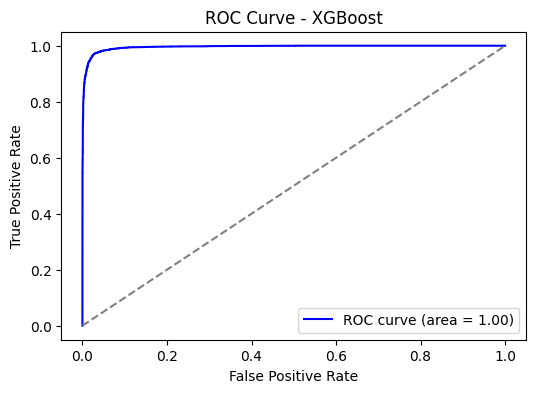

   
Precision- Recall Curve
   


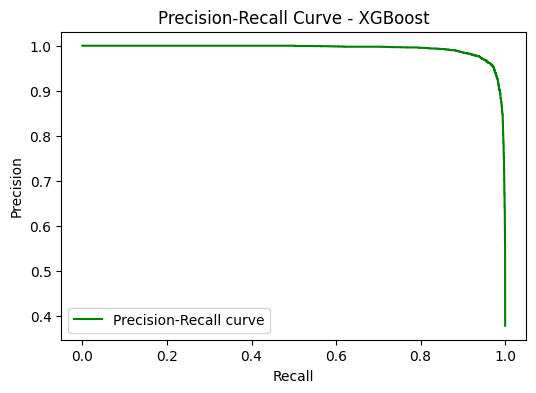

   
feature Importance for Random Forest and XGBoost
   


<ipython-input-24-580c39afdaad>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="coolwarm")


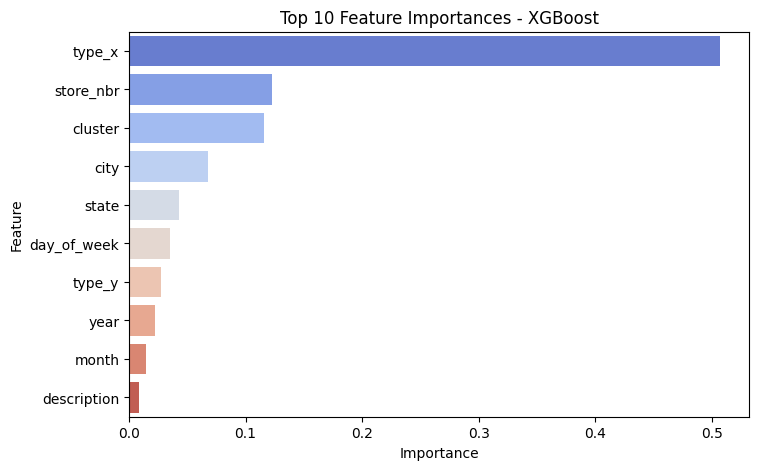

In [26]:
models = {
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Training and evaluating models
for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    evaluate_model(model, name, X_train, y_train, X_test, y_test)


## **Time** **Series Analysis**

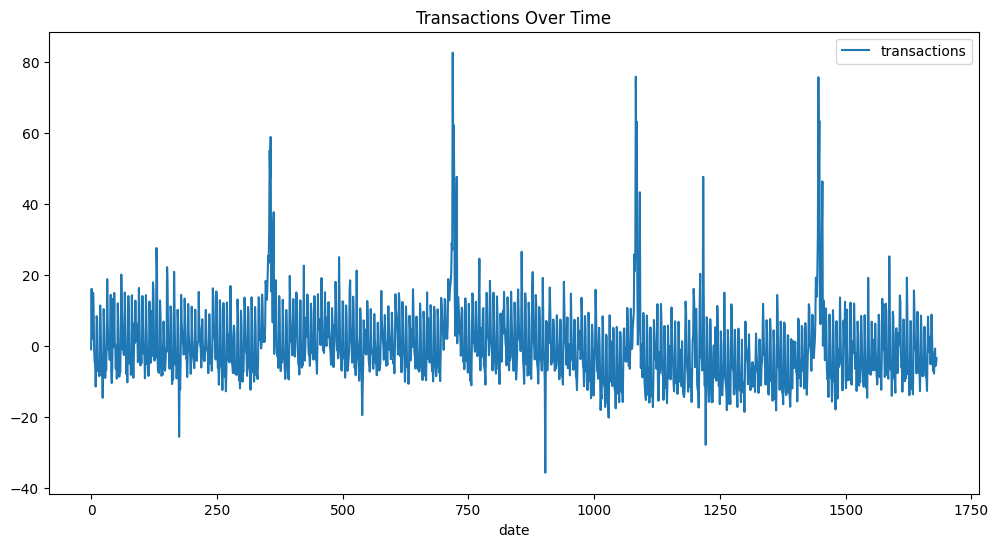

In [36]:

from statsmodels.tsa.seasonal import seasonal_decompose
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Plot transactions trend
ts_data = merged_df[['date', 'transactions']].groupby('date').sum()
ts_data.plot(figsize=(12,6), title='Transactions Over Time')
plt.show()


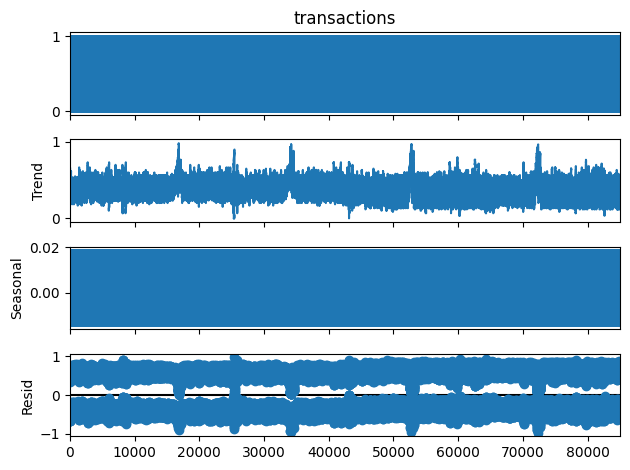

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
decomposed = seasonal_decompose(merged_df['transactions'], model='additive', period=30)

# Plot the decomposition
decomposed.plot()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

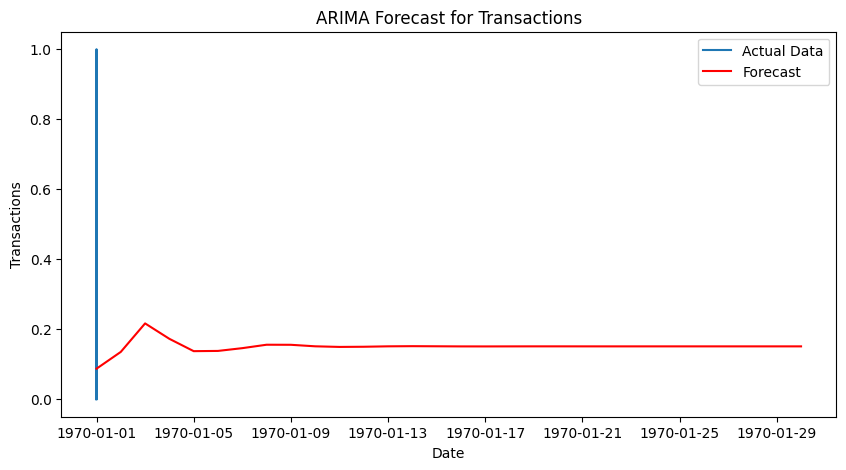

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model (order can be tuned)
model = ARIMA(merged_df['transactions'], order=(5,1,0))  # (p, d, q) values can be optimized
model_fit = model.fit()

# Predict future values
future_steps = 30  # Forecast for next 30 days
forecast = model_fit.forecast(steps=future_steps)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(merged_df['date'], merged_df['transactions'], label="Actual Data")
plt.plot(pd.date_range(start=merged_df['date'].max(), periods=future_steps, freq='D'), forecast, label="Forecast", color='red')
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title("ARIMA Forecast for Transactions")
plt.legend()
plt.show()


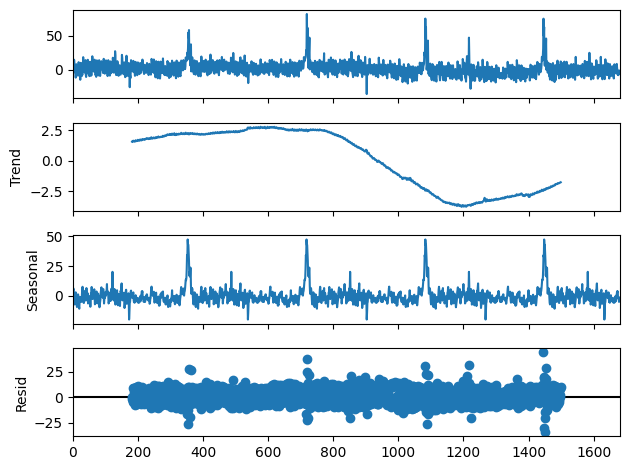

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 113.1331 - val_loss: 101.1066
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 78.4448 - val_loss: 87.3104
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 86.7645 - val_loss: 72.2160
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 68.0054 - val_loss: 88.3606
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 64.7925 - val_loss: 64.2005
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 56.6015 - val_loss: 56.2396
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 50.7358 - val_loss: 50.1129
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 49.0011 - val_loss: 46.8733
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 46.1870 - val_loss: 39.4259
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 37.8730 - val_loss: 44.3308
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 41.4148 - val_loss: 39.6986
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/ste

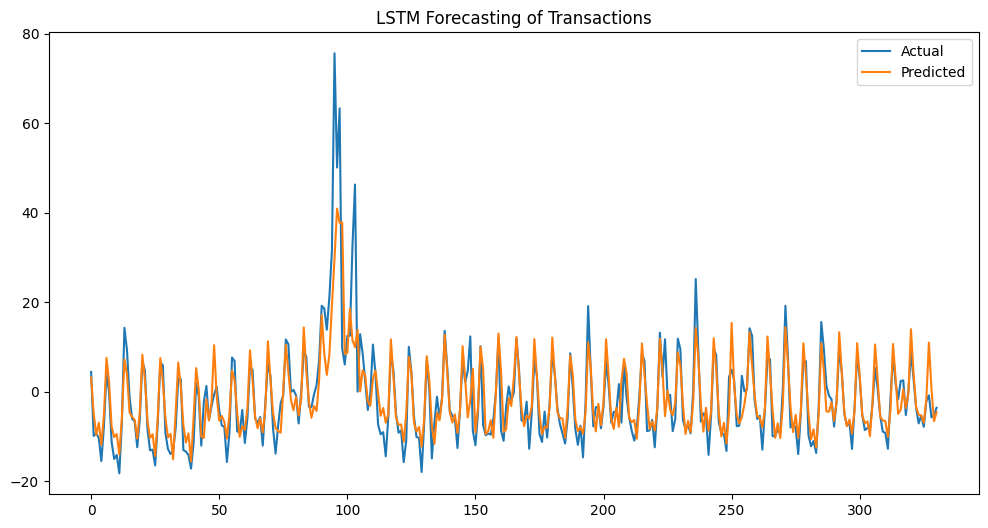

In [35]:

# Seasonal Decomposition
decompose_result = seasonal_decompose(ts_data, model='additive', period=365)
decompose_result.plot()
plt.show()

# LSTM Model
# Prepare data for LSTM
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 30
X, y = create_sequences(ts_data.values, seq_length)
X = np.expand_dims(X, axis=-1)

# Train-Test Split
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Define LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predict & Plot
predictions = model.predict(X_test)
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), predictions, label='Predicted')
plt.legend()
plt.title('LSTM Forecasting of Transactions')
plt.show()
